# 10.2 注意力池化：Nadaraya-Watson 核回归
- **目录**
  - 10.2.1 生成数据集
  - 10.2.2 平均池化
  - 10.2.3 非参数注意力池化
  - 10.2.4 带参数注意力池化
    - 10.2.4.1 批量矩阵乘法
    - 10.2.4.2 定义模型
    - 10.2.4.3 训练

- 上节我们介绍了框架下的注意力机制的主要成分图10.1.3：
  - 查询（自主提示）和键（非自主提示）之间的交互形成了注意力池化，
  - 注意力池化有选择地聚合了值（感官输入）以生成最终的输出。
- 在本节中，我们将介绍注意力池化的更多细节，
以便从宏观上了解注意力机制在实践中的运作方式。
- 具体来说，1964年提出的Nadaraya-Watson核回归模型
是一个简单但完整的例子，可以用于演示具有注意力机制的机器学习。

------------
- **说明：**
- **（1）为何使用Nadaraya-Watson核回归模型说明深度学习的注意力机制？**
    - **Nadaraya-Watson 核回归模型**：是一种非参数的估计方法，它通过对输入空间中相近点的输出值进行**加权平均**来进行预测。
      - 具体来说，给定一个点，其预测值是观测到的数据点的加权平均，而权重由一个核函数决定，该核函数基于输入点和预测点之间的距离。
      - 因此，它自然地将更多的“注意力”放在邻近的、更相关的点上。
  - **深度学习中的注意力模型**：也采用了**加权平均**的思想，但是它作用于序列或结构化的数据。
    - 这种机制通过计算查询（一个表示信息请求的向量）和一组键（表示待考虑信息的向量）之间的相关性（通常使用点积或某种相似性度量）来动态地分配注意力权重。
    - 这使得模型能够聚焦于**当前任务最相关**的信息部分。
  - 二者联系与区别
    - 两者之间的关键联系在于它们都使用了加权平均这一核心思想，以及根据某种度量（距离或相似度）分配权重以聚焦于最重要的信息。
    - Nadaraya-Watson模型中权重的分配是**基于距离**的，而深度学习的注意力模型则是**基于查询和键之间的匹配程度**。
    - 注意力机制的发展受到多方面影响，包括但不限于人类的视觉注意力机理以及早期的序列对序列模型（seq2seq）在处理长序列时的挑战。实际上，深度学习中注意力模型的思想要复杂得多，涉及到序列处理、动态信息选择等多个方面。
    - 尽管如此，从**加权平均**这一点来看，Nadaraya-Watson模型可以被视为一个展现注意力机制原理的简单例子：**通过考虑数据点之间的相似性（或距离）来聚焦于最相关的信息**。这个原理在深度学习中得到了进一步的抽象和应用，形成了现代的注意力模型。

- **（2）查询（自主提示）和键（非自主提示）之间的交互形成了注意力池化的机制**
  - **注意力机制的基本概念**。在注意力机制中，**查询（Query，Q）**、**键（Key，K）**和**值（Value，V）** 是核心组件。
    - **查询（Q）**：通常表示对特定信息的需求或某种自主提示。可以看作是“我们想关注什么”。
    - **键（K）**：表示数据的特征或标识，通常是非自主提示，决定了各个信息点的属性。
    - **值（V）**：表示与键相关的实际内容或信息。
    - 注意力机制的任务是根据查询（Q）与键（K）之间的交互计算出权重（attention weights），然后利用这些权重对值（V）进行加权聚合，从而生成最终的输出。

  - **查询和键之间的交互**。查询（Q）和键（K）之间的交互是注意力机制的核心步骤，其决定了每个值的重要性。具体计算过程如下：
    - **计算相似度**，查询（Q）和键（K）之间的交互首先通过某种相似度函数来衡量它们之间的关系，常用的方法包括：
      - **点积 (Dot Product)**：
      $$
      \text{similarity}(Q, K) = Q \cdot K^T
      $$
      这是最常见的计算方式，表示查询和键在特征空间中的相似性。
      - **余弦相似度 (Cosine Similarity)**：
      $$
       \text{similarity}(Q, K) = \frac{Q \cdot K^T}{\|Q\| \|K\|}
      $$
      通过归一化点积来衡量方向上的相似性。
    - **计算注意力权重**，相似度分数通常需要进一步转换为概率分布，表示查询对每个键的关注程度。这通常通过**Softmax函数**来完成：
    $$
    a_i = \text{softmax}(Q \cdot K^T)_i = \frac{\exp(Q \cdot K_i)}{\sum_{j=1}^n \exp(Q \cdot K_j)}
    $$
    其中：
      - $a_i$ 是第 $i$ 个键的注意力权重。
      - $n$ 是键的数量。
      - Softmax 函数确保权重是非负的，并且总和为 1，从而可以解释为概率分布。

  - **注意力池化的形成**，有了注意力权重 $a_i$，注意力机制的输出就可以通过对值（V）进行加权求和来得到。这一步称为**注意力池化（Attention Pooling）**：
  $$
  \text{Output} = \sum_{i=1}^n a_i V_i
  $$
  解释如下：
    - 每个值 $V_i$ 的贡献由对应的注意力权重 $a_i$ 决定。
    - 查询（Q）通过与键（K）的交互，控制了哪些值（V）对最终输出有更大影响。
    - 注意力池化的本质是对值（V）的选择性聚合。那些与查询（Q）更相关的值（对应的权重 $a_i$ 更高）将在最终输出中占据更大的比例。


------------

In [30]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

## 10.2.1 生成数据集

- 简单起见，考虑下面这个回归问题：
  - 给定的成对的“输入－输出”数据集$\{(x_1, y_1), \ldots, (x_n, y_n)\}$，
如何学习$f$来预测任意新输入$x$的输出$\hat{y} = f(x)$？
- 根据下面的非线性函数生成一个人工数据集，其中加入的噪声项为$\epsilon$：
$$y_i = 2\sin(x_i) + x_i^{0.8} + \epsilon \tag{10.2.1}$$
其中$\epsilon$服从均值为$0$和标准差为$0.5$的正态分布。
- 我们生成了$50$个训练样本和$50$个测试样本。
为了更好地可视化之后的注意力模式，我们将训练样本进行排序。


In [31]:
n_train = 50  # 训练样本数
## rand函数产生(0,1)区间的均匀分布，均值为0.5
## sort函数进行升序排序，第2个返回值是排序后元素在原张量中的索引。
x_train, _ = torch.sort(torch.rand(n_train) * 5)   # 排序后的训练样本,注意乘以5后，x_train的均值变成2.5

In [32]:
def f(x):
    return 2 * torch.sin(x) + x**0.8

## 加上均值为0，标准差为0.5的噪声
y_train = f(x_train) + torch.normal(0.0, 0.5, (n_train,))  # 训练样本的输出
x_test = torch.arange(0, 5, 0.1)  # 测试样本
y_truth = f(x_test)  # 测试样本的真实输出
n_test = len(x_test)  # 测试样本数
n_test

50

In [33]:
# 样本数据
y_train, x_test, y_truth

(tensor([0.2162, 0.1298, 0.9237, 1.1404, 1.7089, 2.0154, 1.6988, 2.3343, 1.9348,
         3.6064, 2.7668, 3.7401, 3.7930, 4.3349, 3.5996, 2.1696, 3.5826, 4.3576,
         4.0369, 4.1124, 3.6488, 4.2666, 3.2434, 3.5269, 4.1806, 3.3823, 2.4199,
         3.5030, 3.0112, 1.8194, 2.1962, 1.7857, 1.9006, 2.3251, 1.4688, 1.3886,
         1.4422, 2.5505, 1.5773, 2.0350, 1.9383, 2.4610, 2.6093, 1.8572, 1.6757,
         1.3413, 1.4405, 1.9895, 0.9833, 1.7617]),
 tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
         0.9000, 1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000, 1.6000, 1.7000,
         1.8000, 1.9000, 2.0000, 2.1000, 2.2000, 2.3000, 2.4000, 2.5000, 2.6000,
         2.7000, 2.8000, 2.9000, 3.0000, 3.1000, 3.2000, 3.3000, 3.4000, 3.5000,
         3.6000, 3.7000, 3.8000, 3.9000, 4.0000, 4.1000, 4.2000, 4.3000, 4.4000,
         4.5000, 4.6000, 4.7000, 4.8000, 4.9000]),
 tensor([0.0000, 0.3582, 0.6733, 0.9727, 1.2593, 1.5332, 1.7938, 2.0402, 2.2712,
       

- 下面的函数将绘制所有的训练样本（样本由圆圈表示），
  - 不带噪声项的真实数据生成函数$f$（标记为“Truth”），
  - 以及学习得到的预测函数（标记为“Pred”）。


In [34]:
def plot_kernel_reg(y_hat):
    d2l.plot(x_test, [y_truth, y_hat], 'x', 'y', legend=['Truth', 'Pred'],
             xlim=[0, 5], ylim=[-1, 5])
    d2l.plt.plot(x_train, y_train, 'o', alpha=0.5);

## 10.2.2 平均池化

- 先使用最简单的估计器来解决回归问题：
基于平均池化来计算所有训练样本输出值的平均值：
$$f(x) = \frac{1}{n}\sum_{i=1}^n y_i \tag{10.2.2}$$
- 如下图所示，这个估计器确实不够聪明：
  - 真实函数$f$（“Truth”）和预测函数（“Pred”）相差很大。


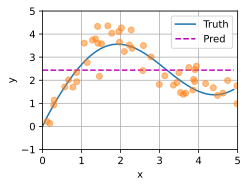

In [35]:
y_hat = torch.repeat_interleave(y_train.mean(), n_test)
plot_kernel_reg(y_hat)

## 10.2.3 非参数注意力池化

- 显然，平均池化忽略了输入$x_i$。
于是Nadaraya和
Watson提出了一个更好的想法，
根据输入的位置对输出$y_i$进行加权：
$$f(x) = \sum_{i=1}^n \frac{K(x - x_i)}{\sum_{j=1}^n K(x - x_j)} y_i \tag{10.2.3}$$
其中$K$是**核（kernel）**。
公式10.2.3所描述的估计器被称为
**Nadaraya-Watson核回归（Nadaraya-Watson kernel regression）**。
- 受此启发，
我们可以从图10.1.3中的注意力机制框架的角度
重写公式10.2.3，
成为一个更加通用的**注意力池化（attention pooling）** 公式：
$$f(x) = \sum_{i=1}^n \alpha(x, x_i) y_i \tag{10.2.4}$$
其中$x$是查询，$(x_i, y_i)$是键值对。
  - 比较公式10.2.4和公式10.2.2，
注意力池化是$y_i$的**加权平均**。
- 将查询$x$和键$x_i$之间的关系建模为
**注意力权重（attention weight）**$\alpha(x, x_i)$，
如公式10.2.4所示，
这个权重将被分配给每一个对应值$y_i$。
- 对于任何查询，模型在所有键值对注意力权重都是一个有效的概率分布：
  - 它们是非负的，并且总和为1。

- 为了更好地理解注意力池化，
我们考虑一个**高斯核（Gaussian kernel）**，其定义为：
$$K(u) = \frac{1}{\sqrt{2\pi}} \exp(-\frac{u^2}{2}) \tag{10.2.5}$$
- 将高斯核代入公式10.2.4和公式10.2.3可以得到：
$$\begin{aligned} f(x) &=\sum_{i=1}^n \alpha(x, x_i) y_i\\ &= \sum_{i=1}^n \frac{\exp\left(-\frac{1}{2}(x - x_i)^2\right)}{\sum_{j=1}^n \exp\left(-\frac{1}{2}(x - x_j)^2\right)} y_i \\&= \sum_{i=1}^n \mathrm{softmax}\left(-\frac{1}{2}(x - x_i)^2\right) y_i. \end{aligned} \tag{10.2.6}$$
  - 在公式10.2.6中，
如果一个键$x_i$越是**接近**给定的查询$x$，
那么分配给这个键对应值$y_i$的注意力权重就会越大，
也就“获得了更多的注意力”。
- 值得注意的是，Nadaraya-Watson核回归是一个非参数模型。
- 因此， 公式10.2.6是
**非参数的注意力池化（nonparametric attention pooling）** 模型。
接下来，我们将基于这个非参数的注意力池化模型来绘制预测结果。
你会发现新的模型预测线是平滑的，并且比平均池化的预测更接近真实。

-----------
- **说明：非参数注意力池化中非参数的具体涵义是什么？**
  - "非参数"在这里指的是这个模型不需要通过训练来学习参数。
  - 具体来说：
    - 在这个模型中，注意力权重是直接通过查询$x$和键$x_i$之间的距离计算得出的，使用的是预先定义好的核函数(如高斯核)
    - 模型不需要学习：
      - 不需要训练权重矩阵
      - 不需要训练偏置项
       - 不需要其他可学习的参数
    - 预测时直接使用训练数据样本和核函数来计算权重，然后进行加权平均
    - 这与参数化的注意力模型形成对比，参数化模型通常需要：
      - 训练可学习的参数
      - 通过优化算法调整这些参数
      - 使用训练数据来学习模型参数
  - 参数注意力池化见下文10.2.4节。


----------------

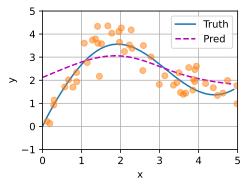

In [36]:
# X_repeat的形状:(n_test,n_train),
# 每一行都包含着相同的测试输入（例如：同样的查询）
'''
使用x_train训练模型，得到注意力权重
'''
X_repeat = x_test.repeat_interleave(n_train).reshape((-1, n_train))
# x_train包含着键。attention_weights的形状：(n_test,n_train),
# 每一行都包含着要在给定的每个查询的值（y_train）之间分配的注意力权重
attention_weights = nn.functional.softmax(-(X_repeat - x_train)**2 / 2, dim=1)
# y_hat的每个元素都是值的加权平均值，其中的权重是注意力权重
y_hat = torch.matmul(attention_weights, y_train)
plot_kernel_reg(y_hat)

In [37]:
attention_weights.shape,y_train.shape,y_hat.shape,attention_weights[0].sum()

(torch.Size([50, 50]), torch.Size([50]), torch.Size([50]), tensor(1.0000))

In [38]:
# 注意力权重计算的中间结果示例
a = torch.tensor([1,2,3,4]).repeat_interleave(4).reshape(4,4)
b = torch.tensor([5,6,7,8])
t = torch.nn.functional.softmax(-(a-b)**2/2,dim=1)

a,b,-(a-b)**2/2,t

(tensor([[1, 1, 1, 1],
         [2, 2, 2, 2],
         [3, 3, 3, 3],
         [4, 4, 4, 4]]),
 tensor([5, 6, 7, 8]),
 tensor([[ -8.0000, -12.5000, -18.0000, -24.5000],
         [ -4.5000,  -8.0000, -12.5000, -18.0000],
         [ -2.0000,  -4.5000,  -8.0000, -12.5000],
         [ -0.5000,  -2.0000,  -4.5000,  -8.0000]]),
 tensor([[9.8897e-01, 1.0986e-02, 4.4899e-05, 6.7503e-08],
         [9.7037e-01, 2.9303e-02, 3.2552e-04, 1.3303e-06],
         [9.2201e-01, 7.5683e-02, 2.2854e-03, 2.5389e-05],
         [8.0515e-01, 1.7965e-01, 1.4747e-02, 4.4532e-04]]))

In [39]:
# 矩阵向量乘法示例
torch.matmul(a,b)

tensor([ 26,  52,  78, 104])

- 现在观察注意力的权重:
  - 这里测试数据的输入相当于查询，而训练数据的输入相当于键。
  - 因为两个输入都是经过排序的，因此由观察可知 **“查询-键”** 对越接近，注意力池化的**注意力权重**就越高。


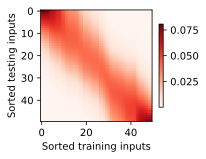

In [40]:
d2l.show_heatmaps(attention_weights.unsqueeze(0).unsqueeze(0),
                  xlabel='Sorted training inputs',
                  ylabel='Sorted testing inputs')

In [41]:
# 比较训练输入(键)与测试输入(查询)的相对大小
torch.sort(x_train)[0][0:10],torch.sort(x_test)[0][0:10]

(tensor([0.1155, 0.1858, 0.2851, 0.2965, 0.5690, 0.6664, 0.7770, 0.8717, 0.8759,
         1.0693]),
 tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
         0.9000]))

In [42]:
# 注意力权重形状
attention_weights.shape, attention_weights.unsqueeze(0).unsqueeze(0).shape

(torch.Size([50, 50]), torch.Size([1, 1, 50, 50]))

--------
- **说明：**
- **（1）如何理解““查询-键” 对越接近，注意力池化的注意力权重就越高”？**
  - 上述论述指的是在一种特定的注意力池化模型中，如非参数的注意力池化模型，测试数据的输入作为查询（$x$），而训练数据的输入作为键($x_i$)。在这种模型中，注意力权重（$\alpha(x, x_i)$）是根据查询和键之间的关系动态计算的，从而决定了键对应的值（$y_i$）在最终输出（$f(x)$）中的重要性。
  - 因为模型中使用的是经过排序的输入，观察到的现象是，当查询与键越接近时，即查询（测试数据的输入）和键（训练数据的输入）之间的距离较小时，分配给这个键对应的注意力权重就越高。换句话说，在经过排序的输入数据中，相邻或接近的数据点（查询和键）在模型中被认为是更相关的，因此会被赋予更高的权重。
  - 这是因为，在很多情况下，相似或接近的输入数据点往往具有相似的输出值或特性。通过将较高的注意力权重分配给与查询更接近的键，模型能更准确地捕捉数据之间的局部相关性，从而在做出预测或决策时考虑到这些相关性，进而提高模型的性能。
  - 简而言之，这种“越接近，权重越高”的机制使模型能够专注于与当前查询最为相关的信息，通过这种方式，模型在预测时能够根据实际数据的分布和特性进行自适应调整，从而生成更加准确的预测结果。
- **（2）如何解读热图？**
  - 通过热图（heat map）来展示注意力权重矩阵可以直观地体现“越接近，权重越高”的机制。热图是一种数据可视化技术，能够使用颜色来表示数据矩阵中各个单元的大小。在展示注意力权重的情境中，颜色的深浅可用于表示权重的大小，颜色越深（或越鲜艳）表示对应的权重越高。
  - 具体来说，要通过热图体现出“越接近，权重越高”的机制，可以按照以下步骤进行：
    - **计算注意力权重**：首先，需要为每对查询-键（即每个测试数据的输入和训练数据的输入组合）计算出一个注意力权重。这个权重反映了键（训练数据）对于给定的查询（测试数据）的重要性。
    - **构建权重矩阵**：将上一步计算出的所有注意力权重组织成一个矩阵。**矩阵的每一行可以表示一个查询对应于所有键的注意力权重，或者反之，每一列代表一个键对于所有查询的注意力权重**。
    - **选择合适的颜色编码**：选择一个颜色渐变方案来表示权重的大小。通常，颜色越深或越鲜艳表示权重越大，颜色越浅表示权重越小。
    - **绘制热图**：根据权重矩阵绘制热图，每个单元格的颜色根据其对应的权重来确定。
  - 按照上述方法绘制出的热图将直观地展示出查询和键之间的距离与其对应的权重之间的关系。
  - 在这样的热图中，你会注意到沿着矩阵对角线（假设对角线代表查询和键相同或非常接近的情况）颜色通常会较深，因为这表示权重较高。而远离对角线的地方（表示查询和键的距离较远），颜色则会较浅，表示权重较低。
  - 这种可视化手段直观地反映了“**越接近，权重越高**”的注意力分配机制。
------------

## 10.2.4 带参数注意力池化

- 非参数的Nadaraya-Watson核回归具有**一致性（consistency）** 的优点：
  - 如果有足够的数据，此模型会收敛到最优结果。
- 可以轻松地将**可学习的参数**集成到注意力池化中。
- 例如，与公式10.2.6略有不同，
在下面的查询$x$和键$x_i$之间的距离乘以<b>可学习参数$w$</b>：
$$\begin{aligned}f(x) &= \sum_{i=1}^n \alpha(x, x_i) y_i \\&= \sum_{i=1}^n \frac{\exp\left(-\frac{1}{2}((x - x_i)w)^2\right)}{\sum_{j=1}^n \exp\left(-\frac{1}{2}((x - x_j)w)^2\right)} y_i \\&= \sum_{i=1}^n \mathrm{softmax}\left(-\frac{1}{2}((x - x_i)w)^2\right) y_i.\end{aligned} \tag{10.2.7}$$
- 在本节的余下部分，将**通过训练这个模型公式10.2.7来学习注意力池化的参数**。

### 10.2.4.1 批量矩阵乘法

- 为了更有效地计算小批量数据的注意力，可以利用深度学习开发框架中提供的批量矩阵乘法。
- 假设第一个小批量数据包含$n$个矩阵$\mathbf{X}_1,\ldots, \mathbf{X}_n$，
形状为$a\times b$，
第二个小批量包含$n$个矩阵$\mathbf{Y}_1, \ldots, \mathbf{Y}_n$，
形状为$b\times c$。
- 它们的批量矩阵乘法得到$n$个矩阵$\mathbf{X}_1\mathbf{Y}_1, \ldots, \mathbf{X}_n\mathbf{Y}_n$，
形状为$a\times c$。
- 因此，<B>假定两个张量的形状分别是$(n,a,b)$和$(n,b,c)$，它们的批量矩阵乘法输出的形状为$(n,a,c)$</B>。

In [43]:
## 此乘法很重要，几乎贯穿深度学习的整个计算过程
X = torch.ones((2, 1, 4))
Y = torch.ones((2, 4, 6))
## torch.bmm和@二者操作效果一样
torch.bmm(X, Y).shape,torch.bmm(X, Y), X@Y

(torch.Size([2, 1, 6]),
 tensor([[[4., 4., 4., 4., 4., 4.]],
 
         [[4., 4., 4., 4., 4., 4.]]]),
 tensor([[[4., 4., 4., 4., 4., 4.]],
 
         [[4., 4., 4., 4., 4., 4.]]]))

- 在注意力机制的背景中，我们可以**使用小批量矩阵乘法来计算小批量数据中的加权平均值**。


In [44]:
weights = torch.ones((2, 10)) * 0.1
values = torch.arange(20.0).reshape((2, 10))
torch.bmm(weights.unsqueeze(1), values.unsqueeze(-1))

tensor([[[ 4.5000]],

        [[14.5000]]])

-----------------
- **说明：torch.bmm与torch.matmul函数的区别与联系**
  - `bmm`和`matmul`都是PyTorch库中用于进行矩阵乘法的函数。它们的主要区别在于处理的输入张量的维度和相应的计算方式。
  - **bmm**: `torch.bmm()` 是batch matrix multiplication的缩写，用于批量的矩阵乘法。它接受两个3维的张量作为输入，其中每一个3维张量都被看作是一个批量的2维矩阵。假设输入为 A (b, n, m) 和 B (b, m, p)，bmm的计算过程是：对于每一个batch，都执行对应的矩阵乘法，最后得到输出 C (b, n, p)。
  - **matmul**: `torch.matmul()` 可以用于更高维度的张量，且它的行为取决于输入张量的维度。当输入张量的维度为1时，它执行向量的点积。当输入张量的维度为2时，它执行矩阵乘法。当输入张量的维度大于2时，它会执行批量的矩阵乘法。
  - `bmm`和`matmul`的联系是，当处理的输入张量的维度为3时，这两个函数的行为是一样的，都是执行批量的矩阵乘法。而`matmul`的应用更广泛，它能处理更高维度的张量，且它的计算行为会根据输入张量的维度进行调整。
  - 在实际使用时，应根据需要处理的张量的具体维度和期望的计算行为来选择合适的函数。

-----------

### 10.2.4.2 定义模型

- 基于公式10.2.7中的
**带参数的注意力池化**，使用小批量矩阵乘法，
定义Nadaraya-Watson核回归的带参数版本为：


In [45]:
class NWKernelRegression(nn.Module):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = nn.Parameter(torch.rand((1,), requires_grad=True))
        
    '''
    在后面训练中：
    queries:x_train(50) ->(50, 49) keys:(50, 49), values:(50, 49)
    ''' 
    def forward(self, queries, keys, values):
        # queries和attention_weights的形状为(查询个数，“键－值”对个数)
        ## queries的形状要和keys一致，否则无法进行减法操作，进而进行softmax计算
        queries = queries.repeat_interleave(keys.shape[1]).reshape((-1, keys.shape[1]))
        ## 注意力权重,注意参数w
        self.attention_weights = nn.functional.softmax(
            -((queries - keys) * self.w)**2 / 2, dim=1)
        # values的形状为(查询个数，“键－值”对个数)
        return torch.bmm(self.attention_weights.unsqueeze(1),
                         values.unsqueeze(-1)).reshape(-1)

### 10.2.4.3 训练

- 接下来，**将训练数据集变换为键和值**用于训练注意力模型。
- 在带参数的注意力池化模型中，任何一个训练样本的输入都会和除自己以外的所有训练样本的“键－值”对进行计算，
从而得到其对应的预测输出。


In [46]:
## 为何要删除对角线元素？
# X_tile的形状:(n_train，n_train)，每一行都包含着相同的训练输入
X_tile = x_train.repeat((n_train, 1))
# Y_tile的形状:(n_train，n_train)，每一行都包含着相同的训练输出
Y_tile = y_train.repeat((n_train, 1))
# keys的形状:('n_train'，'n_train'-1)
keys = X_tile[(1 - torch.eye(n_train)).type(torch.bool)].reshape((n_train, -1))
# values的形状:('n_train'，'n_train'-1)
values = Y_tile[(1 - torch.eye(n_train)).type(torch.bool)].reshape((n_train, -1))

In [47]:
(x_train.repeat_interleave(49).reshape(50,49)-keys).shape

torch.Size([50, 49])

In [48]:
X_tile.shape,Y_tile.shape,keys.shape,values.shape

(torch.Size([50, 50]),
 torch.Size([50, 50]),
 torch.Size([50, 49]),
 torch.Size([50, 49]))

----------
- **说明：NWKernelRegression前向传播的手工模拟计算过程**

In [49]:
x = torch.tensor([1.,2.,3.,4.])
x1 = x.repeat((4,1))
y = torch.tensor([5.,6.,7.,8.])
y1 = y.repeat((4,1))
# 生成键和值
k = x1[(1-torch.eye(4)).type(torch.bool)].reshape(4,-1)
v = y1[(1-torch.eye(4)).type(torch.bool)].reshape(4,-1)
k,v

(tensor([[2., 3., 4.],
         [1., 3., 4.],
         [1., 2., 4.],
         [1., 2., 3.]]),
 tensor([[6., 7., 8.],
         [5., 7., 8.],
         [5., 6., 8.],
         [5., 6., 7.]]))

In [21]:
# 查询生成
q = x.repeat_interleave(3).reshape(4,3)
q

tensor([[1., 1., 1.],
        [2., 2., 2.],
        [3., 3., 3.],
        [4., 4., 4.]])

In [50]:
# ！！注意：此时查询与键相减时，避免了同一个元素与自己相减的情况出现
q-k

tensor([[-1., -2., -3.],
        [ 1., -1., -2.],
        [ 2.,  1., -1.],
        [ 3.,  2.,  1.]])

In [51]:
# 注意力权重
w = nn.functional.softmax(-((q - k))**2 / 2, dim=1)
w

tensor([[0.8055, 0.1797, 0.0148],
        [0.4498, 0.4498, 0.1004],
        [0.1004, 0.4498, 0.4498],
        [0.0148, 0.1797, 0.8055]])

In [52]:
# 注意力池化，即输出
o = torch.bmm(w.unsqueeze(1),v.unsqueeze(-1)).reshape(-1)
o

tensor([6.2092, 6.2007, 6.7993, 6.7908])

In [53]:
# 对角线操作
1-torch.eye(4), (1-torch.eye(4)).type(torch.bool), x1[(1-torch.eye(4)).type(torch.bool)]

(tensor([[0., 1., 1., 1.],
         [1., 0., 1., 1.],
         [1., 1., 0., 1.],
         [1., 1., 1., 0.]]),
 tensor([[False,  True,  True,  True],
         [ True, False,  True,  True],
         [ True,  True, False,  True],
         [ True,  True,  True, False]]),
 tensor([2., 3., 4., 1., 3., 4., 1., 2., 4., 1., 2., 3.]))

In [54]:
x1[(1-torch.eye(4)).type(torch.bool)].reshape(4,-1)

tensor([[2., 3., 4.],
        [1., 3., 4.],
        [1., 2., 4.],
        [1., 2., 3.]])

------

- **训练带参数的注意力池化模型**时，使用平方损失函数和随机梯度下降。


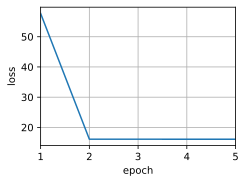

In [55]:
net = NWKernelRegression()
loss = nn.MSELoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=0.5)
animator = d2l.Animator(xlabel='epoch', ylabel='loss', xlim=[1, 5])

for epoch in range(5):
    trainer.zero_grad()
    l = loss(net(x_train, keys, values), y_train)
    l.sum().backward()
    trainer.step()
    print(f'epoch {epoch + 1}, loss {float(l.sum()):.6f}')
    animator.add(epoch + 1, float(l.sum()))

- 如下所示，训练完带参数的注意力池化模型后，我们发现：
  - 在尝试拟合带噪声的训练数据时，**预测结果绘制**的线不如之前非参数模型的平滑。


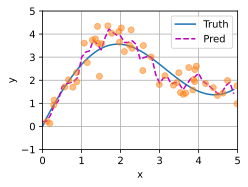

In [56]:
# keys的形状:(n_test，n_train)，每一行包含着相同的训练输入（例如，相同的键）
## keys与values仍是使用的训练数据
keys_test = x_train.repeat((n_test, 1))
# value的形状:(n_test，n_train)
values_test = y_train.repeat((n_test, 1))
net.eval()
##使用到了模型的训练参数w，使用测试数据x_test进行测试
y_hat = net(x_test, keys_test, values_test).unsqueeze(1).detach()
plot_kernel_reg(y_hat)

- 为什么新的模型更不平滑了呢？
- 我们看一下输出结果的绘制图：
  - 与非参数的注意力池化模型相比，
带参数的模型加入可学习的参数后，
**曲线在注意力权重较大的区域变得更不平滑**。


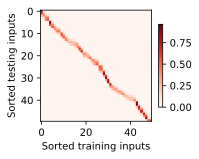

In [57]:
d2l.show_heatmaps(net.attention_weights.unsqueeze(0).unsqueeze(0),
                  xlabel='Sorted training inputs',
                  ylabel='Sorted testing inputs')

---------------------
- **说明：**
- **(1)为何说“与非参数的注意力池化模型相比， 带参数的模型加入可学习的参数后， 曲线在注意力权重较大的区域变得更不平滑”？** 
  - 这个现象的出现是因为带参数的模型有**更大的自由度**，可以**学习到更复杂的数据模式和结构**。
  - 对比于非参数模型，非参数模型仅依赖于数据本身和给定的核函数，没有可学习的参数，其表达能力受限。
  - 当注意力模型中引入可学习的参数时，模型可以根据数据特点和任务需求进行**自我调整**和**优化**，这就意味着模型可以更好地适应数据中存在的复杂关系和模式。
  - 当模型的注意力权重较大的区域（即模型认为比较重要的区域），由于有更多的参数参与学习和调整，所以模型在这些区域可能会学习到更复杂的数据特性。这也就解释了为什么在这些区域，模型的预测结果可能会变得不那么平滑。
  - 总的来说，这是因为带参数的模型在更复杂的数据模式和结构上具有更强的表示能力和学习能力，而这些复杂的模式和结构可能会导致在注意力权重较大的区域的预测结果出现不平滑的现象。

- **(2)曲线的不光滑有何具体表现形式？**
  - 曲线不光滑通常是指曲线的走势不再是连续平滑的，而是出现了许多的**拐点、锐角、断点、突变、震荡**等情况。
  - **突变**：在曲线的某些点，函数值或者导数值突然改变，没有渐变的过程。例如阶跃函数，它的值在某一点突然从一个常数跳跃到另一个常数。
  - **断点**：曲线的连续性被打破，在某些点上，曲线断开，没有定义或者与周围的点完全不连续。例如，分段函数在某些点上可能没有定义。
  - **震荡**：曲线在某个区间内快速地上下波动，即使这个区间非常小。例如，在正弦函数的一段区间内，函数值可能会快速地在正负之间变化。
  - **锐角和拐点**：曲线在某些点上突然改变方向，形成锐角或者拐点。例如，$y=|x|$ 在$x=0$处形成了一个锐角。
  -  **不可微**：曲线在某些点上的导数不存在，即使曲线在这些点上是连续的。例如，函数 $y=x^{\frac{1}{3}}$ 在$x=0$处是连续的，但是不可微。
  - 这些不光滑的表现形式可能会给理解函数的性质和进行数学运算带来困难，例如求解微分方程、进行积分计算等。然而，一些现实世界的现象和非线性系统的动态行为却可能正是通过这种不光滑的方式来表现的。
 
------------------------

## 小结

* Nadaraya-Watson核回归是具有注意力机制的机器学习范例。
* Nadaraya-Watson核回归的注意力池化是对训练数据中输出的加权平均。从注意力的角度来看，分配给每个值的注意力权重取决于将值所对应的键和查询作为输入的函数。
* 注意力池化可以分为非参数型和带参数型。